In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

import torch
import torch.utils.data
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
from torch import Tensor as T

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import *

0.7564624521359409 0.5660170218915055


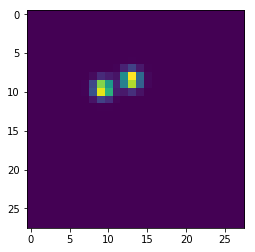

In [4]:
N = 600000
batch_size = 128

a, b = (np.random.rand(2)+1)/2
print(a, b)
labels = 2*np.pi*(np.random.rand(N, 2)-0.5)
batch_generator = make_batch_generator(labels, [a,b], N, batch_size)
plt.imshow(batch_generator.__next__()[0][0, 0])
batch_generator = make_batch_generator(labels, [a,b], N, batch_size)

In [ ]:
device = torch.device("cuda")
bottleneck = 10
model = VAE(bottleneck=bottleneck).to(device)
train_loss = model.fit(batch_generator)
print(train_loss/N)

Loss at batch 03252: 22.3: : 3251it [00:57, 55.59it/s]

In [ ]:
with torch.no_grad():
    sample = torch.randn(9, bottleneck).to(device)
    sample = model.decode(sample).cpu()

In [ ]:
from itertools import product
to_ind = np.array(list(product(range(3), range(3))))

fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_size_inches((10, 10))
for i, img in enumerate(np.array(sample)):
    ind = to_ind[i]
    ax[ind[0], ind[1]].imshow(img.reshape(28, 28))
plt.tight_layout()
plt.show()